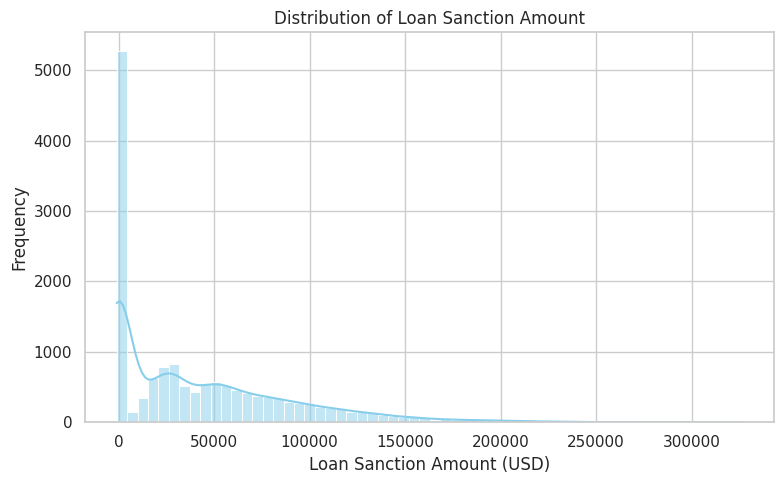

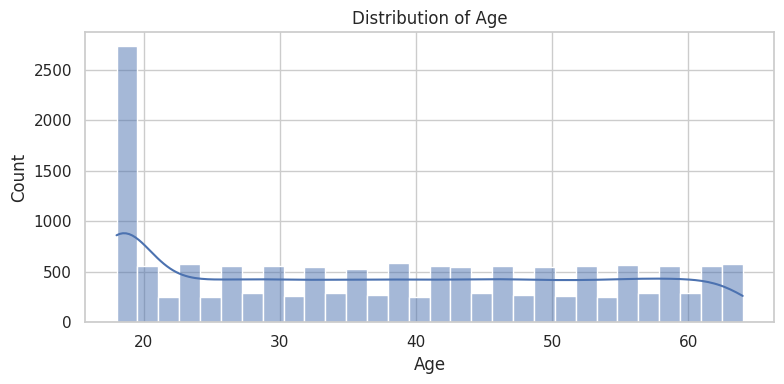

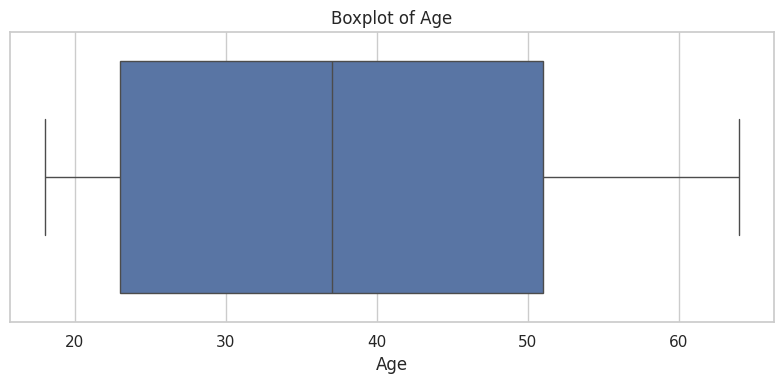

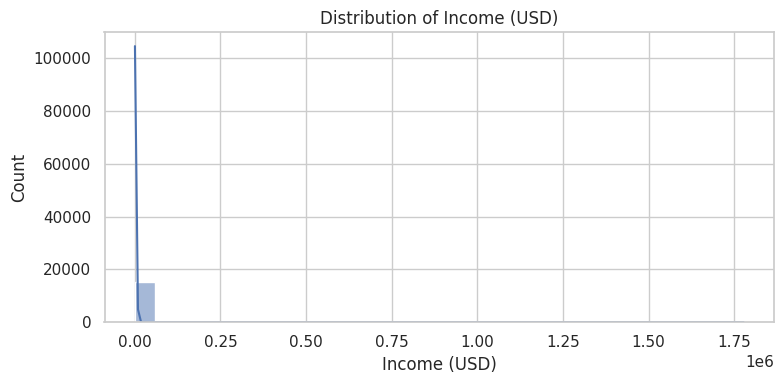

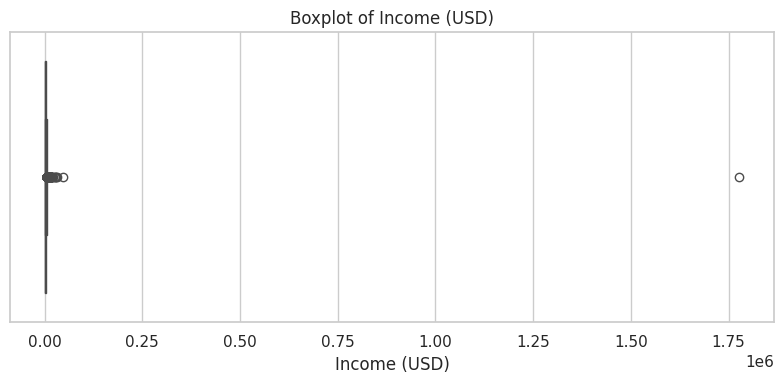

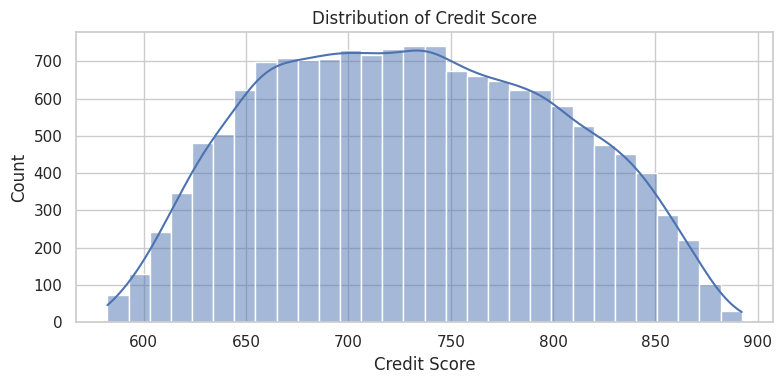

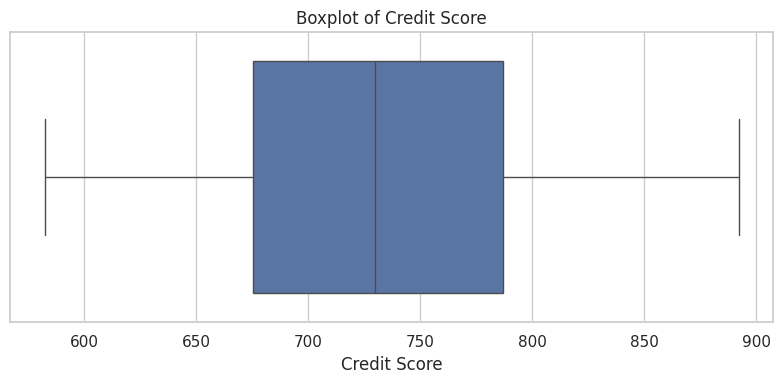

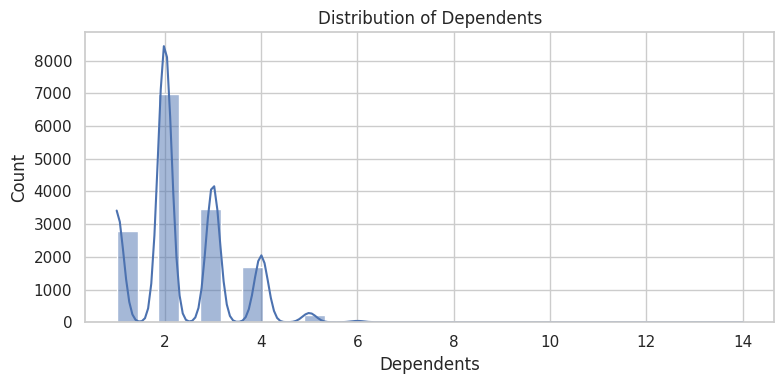

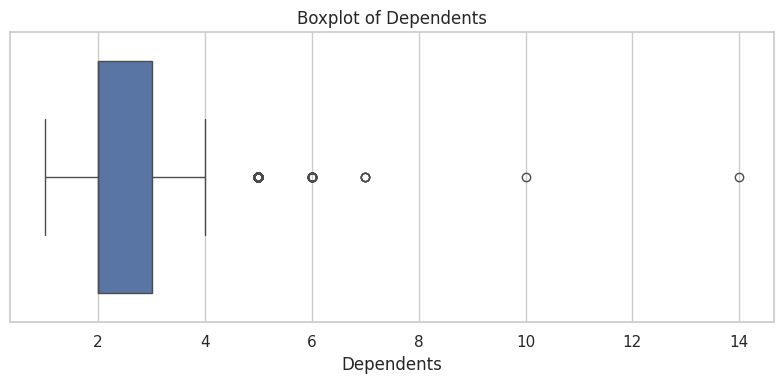

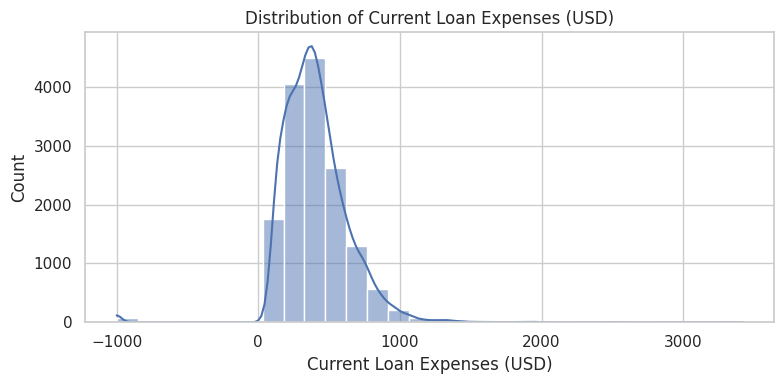

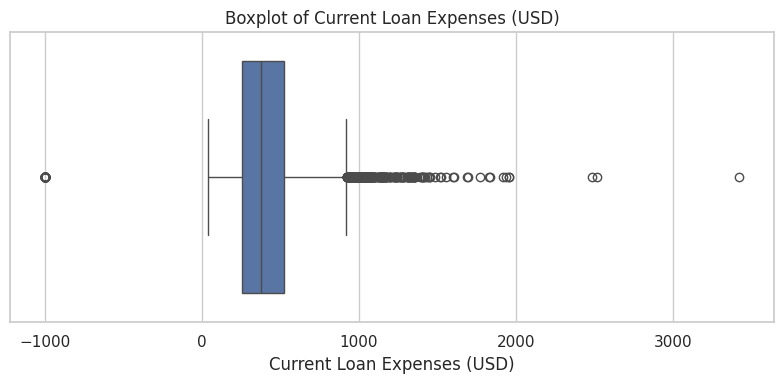

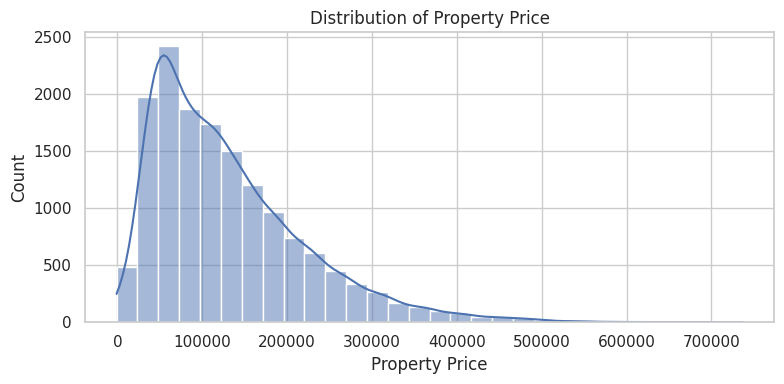

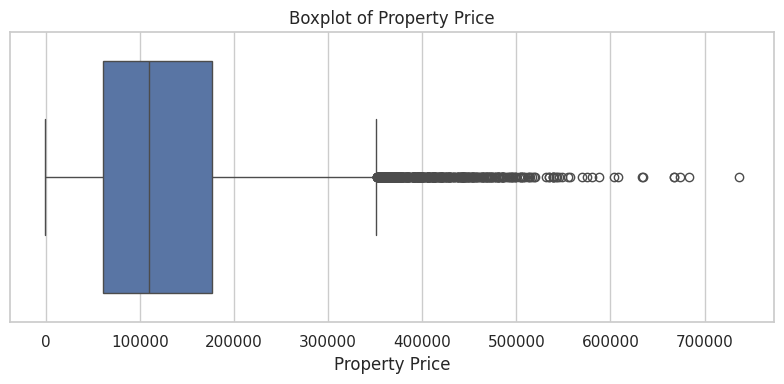

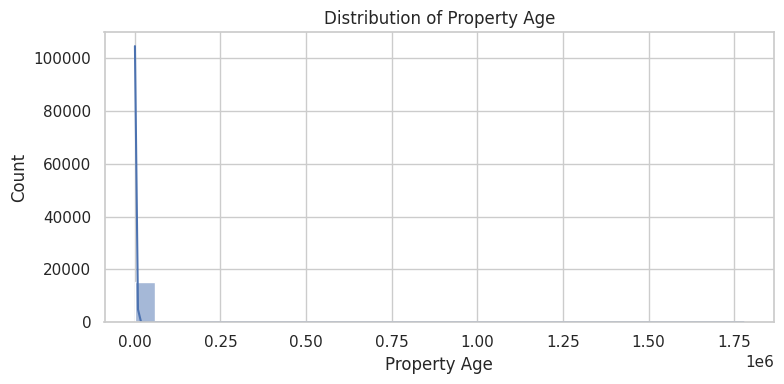

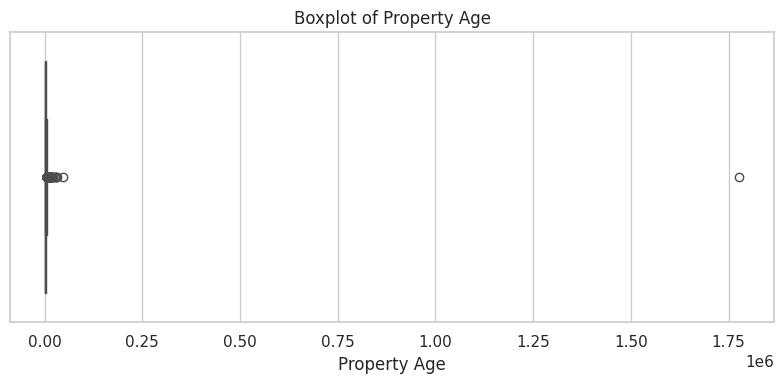

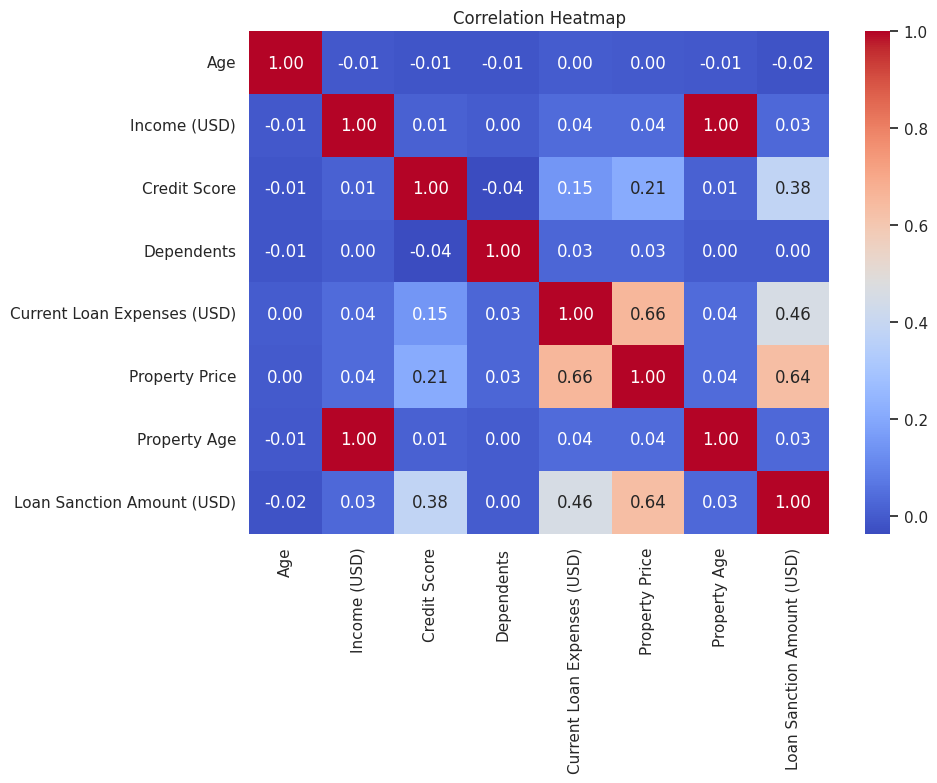

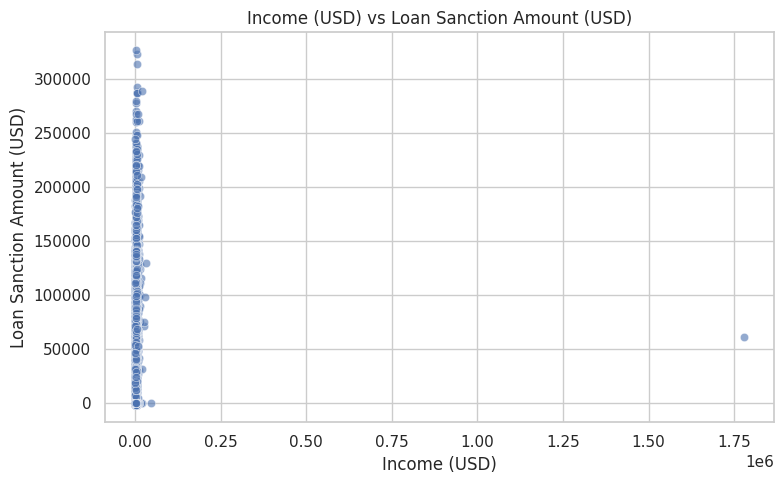

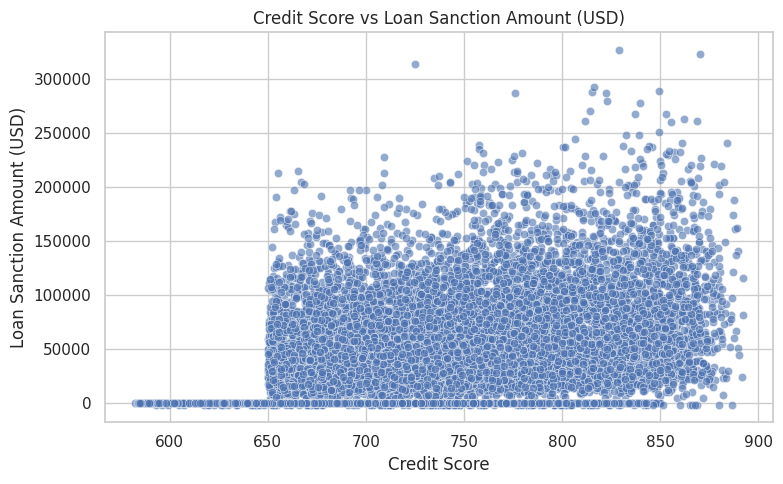

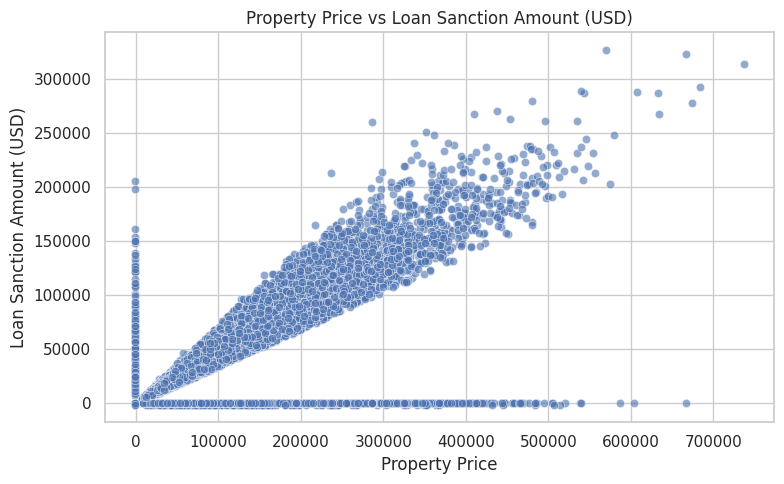

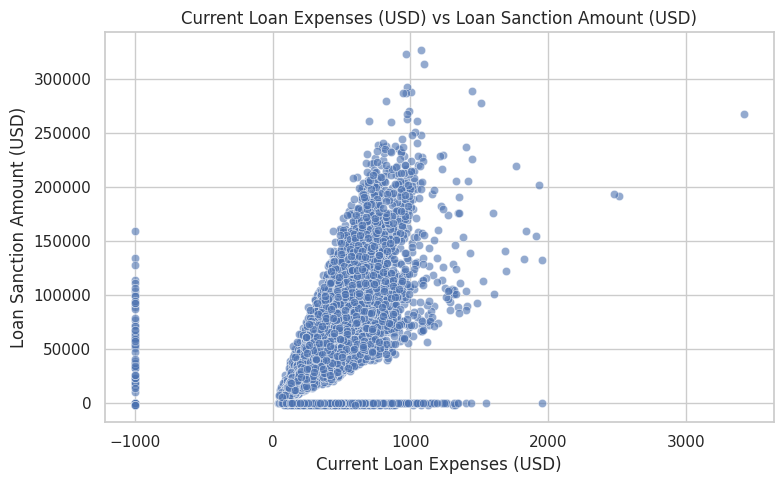

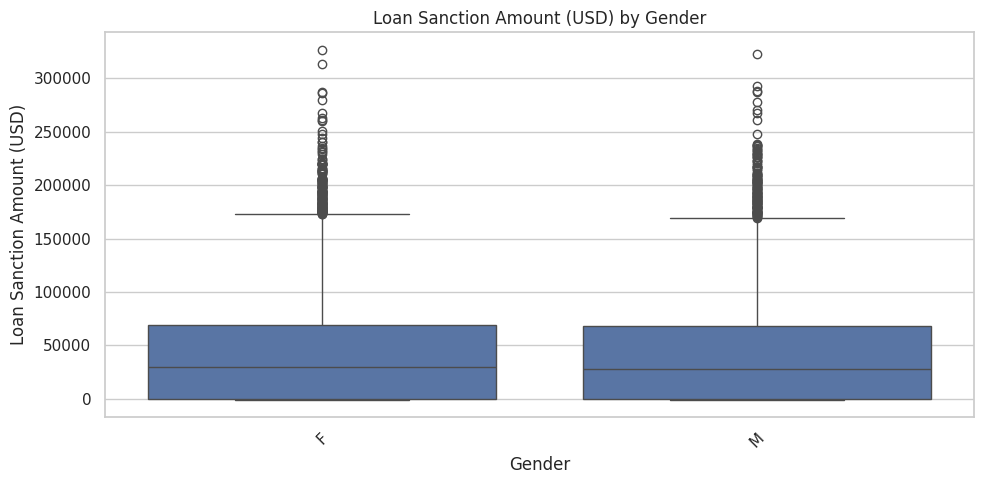

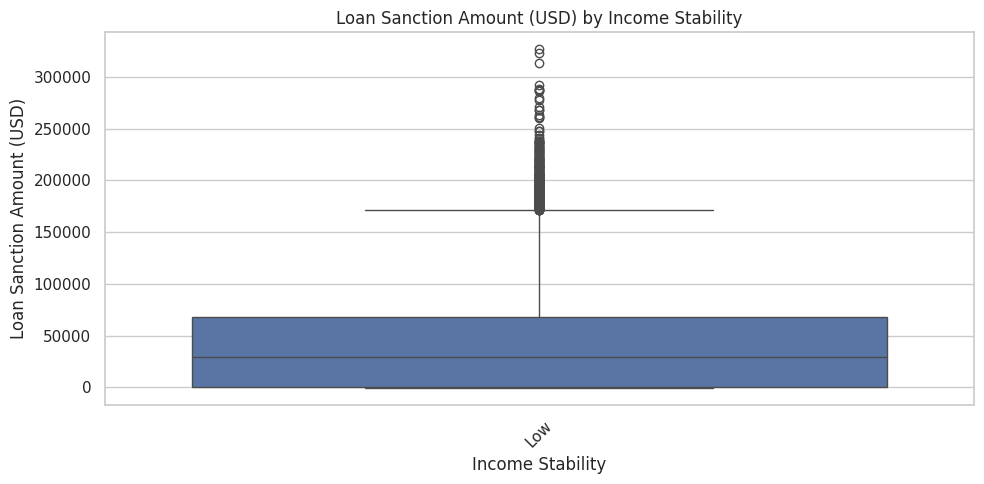

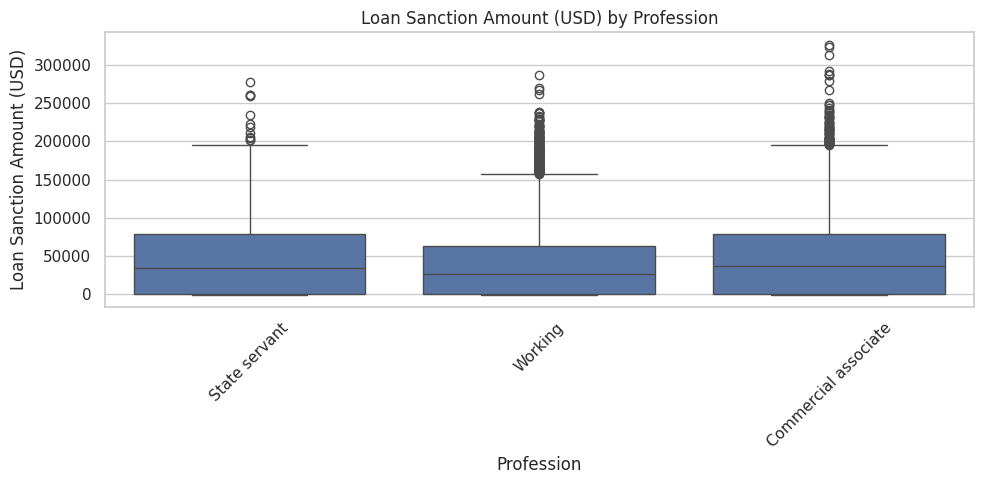

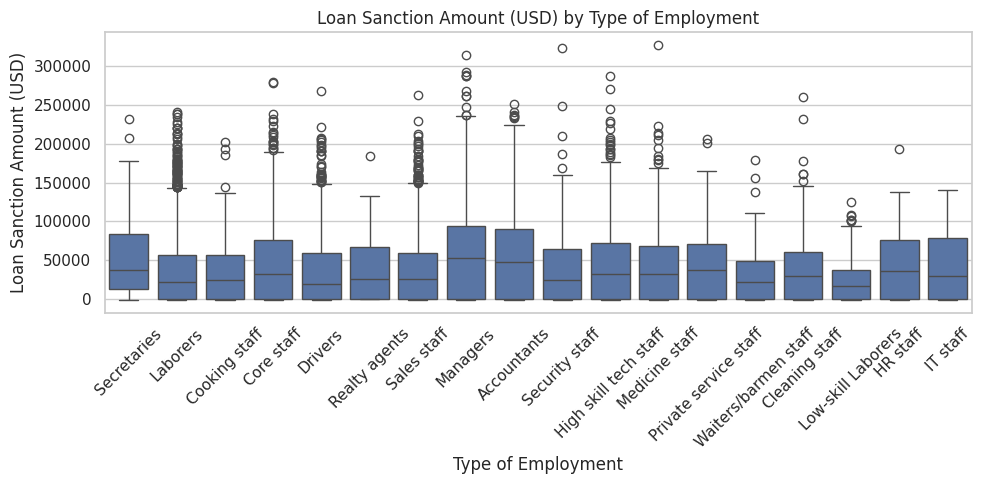

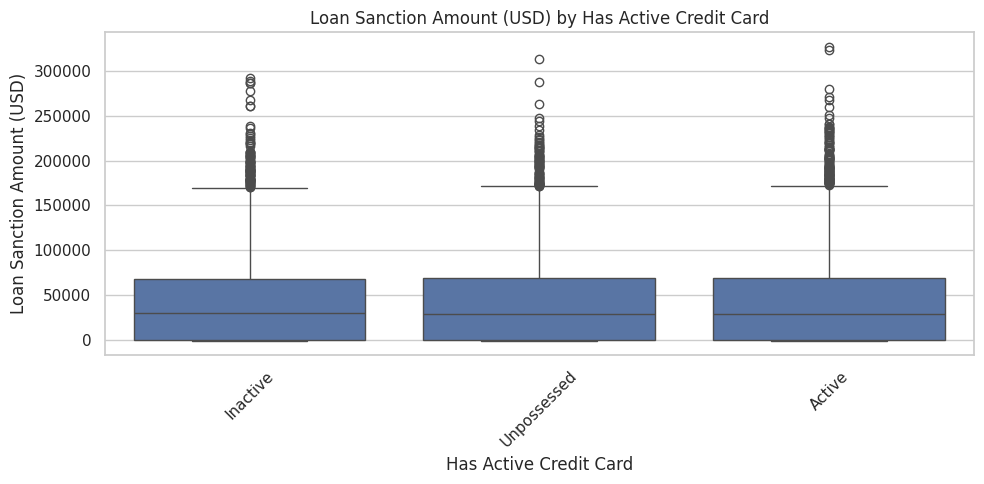

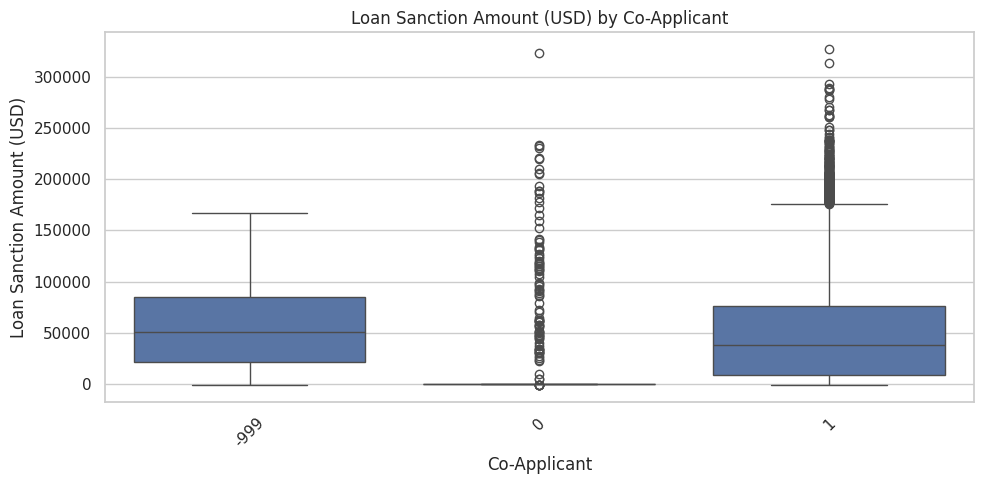

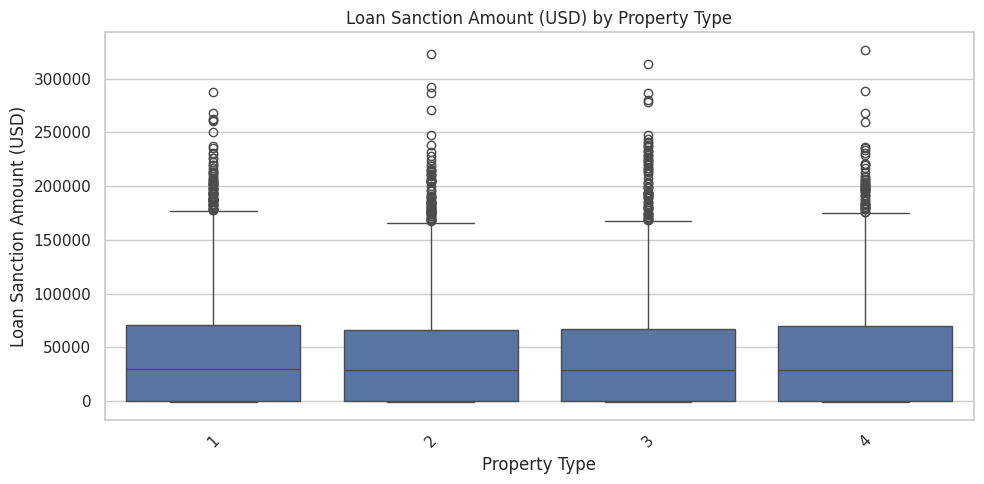

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


--- Validation Metrics ---
MAE: 21904.22
MSE: 971926456.02
RMSE: 31175.74
R2 Score: 0.5764
Adjusted R2: 0.5743
--- Test Metrics ---
MAE: 22145.56
MSE: 998067220.05
RMSE: 31592.20
R2 Score: 0.5472
Adjusted R2: 0.5450


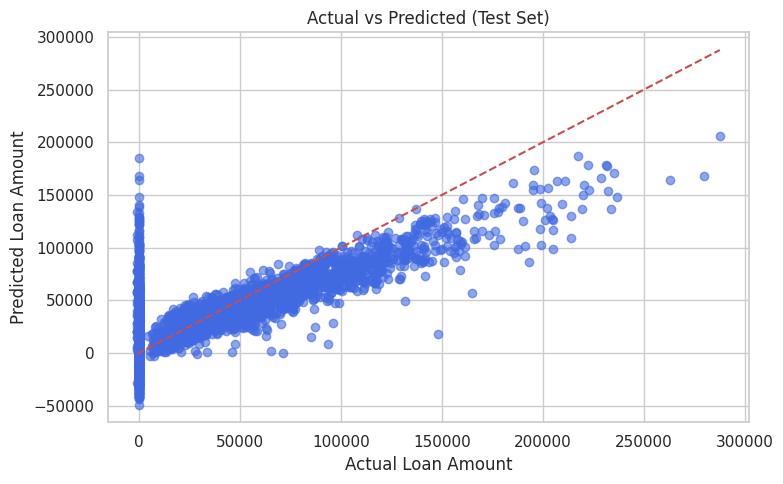

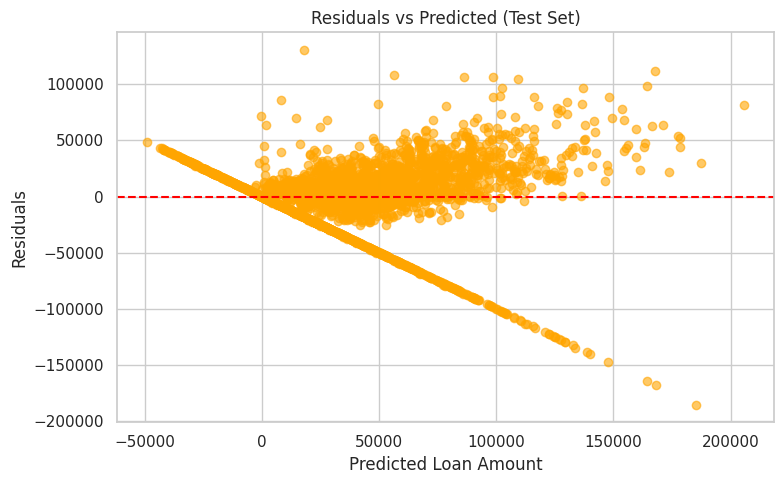


--- Cross Validation Results ---
           Fold           MAE           MSE          RMSE  R2 Score
0        Fold 1  22090.850898  9.958134e+08  31556.511441  0.548268
1        Fold 2  21386.316300  9.397852e+08  30655.915856  0.565159
2        Fold 3  22128.770641  1.084589e+09  32933.099354  0.518335
3        Fold 4  21838.681388  9.653007e+08  31069.288577  0.572711
4        Fold 5  21917.131664  9.546132e+08  30896.814968  0.581696
Average     NaN  21872.350178  9.880203e+08  31422.326039  0.557234


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

sns.set(style="whitegrid")

#  Step 1: Load the dataset
train_df = pd.read_csv("/content/train.csv")

#  Step 2: Define target variable
target = 'Loan Sanction Amount (USD)'

#  Step 3: Drop unnecessary columns
cols_to_drop = ['Customer ID', 'Name', 'Property ID', 'Location', 'Property Location']
train_df.drop(columns=cols_to_drop, inplace=True)

#  Step 4: Handle missing values
train_df.dropna(inplace=True)

#  Step 5: Visualize Target Distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df[target], kde=True, color='skyblue')
plt.title('Distribution of Loan Sanction Amount')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#  Step 6: Visualize numerical features
num_features = ['Age', 'Income (USD)', 'Credit Score', 'Dependents',
                'Current Loan Expenses (USD)', 'Property Price', 'Property Age']

for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

#  Step 7: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = train_df[num_features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#  Step 8: Scatter plots (numerical features vs target)
key_features = ['Income (USD)', 'Credit Score', 'Property Price', 'Current Loan Expenses (USD)']
for col in key_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=train_df, x=col, y=target, alpha=0.6)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

#  Step 9: Boxplots of categorical features vs target
cat_features = ['Gender', 'Income Stability', 'Profession', 'Type of Employment',
                'Has Active Credit Card', 'Co-Applicant', 'Property Type']

for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x=col, y=target)
    plt.title(f'{target} by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#  Step 10: Feature Engineering
train_df['Total_Income'] = train_df['Income (USD)'] + train_df['Current Loan Expenses (USD)']
train_df['Log_Loan_Amount'] = np.log1p(train_df[target])
train_df['Log_Income'] = np.log1p(train_df['Income (USD)'])
train_df['Age_Bin'] = pd.cut(train_df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=False)

#  Step 11: Define final features and target
numerical_features = ['Age', 'Income (USD)', 'Credit Score', 'Dependents',
                      'Current Loan Expenses (USD)', 'Property Price', 'Property Age', 'Total_Income']
X = train_df[numerical_features + cat_features]
y = train_df[target]

#  Step 12: Split dataset (Train=60%, Validation=20%, Test=20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

#  Step 13: Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])

#  Step 14: Full pipeline with Linear Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#  Step 15: Train the model
pipeline.fit(X_train, y_train)

#  Step 16: Predict & Evaluate on Validation Set
y_val_pred = pipeline.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)
adj_r2_val = 1 - (1 - r2_val) * (len(y_val) - 1) / (len(y_val) - X_val.shape[1] - 1)

print("--- Validation Metrics ---")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2 Score: {r2_val:.4f}")
print(f"Adjusted R2: {adj_r2_val:.4f}")

#  Step 17: Predict & Evaluate on Test Set
y_test_pred = pipeline.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("--- Test Metrics ---")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2 Score: {r2_test:.4f}")
print(f"Adjusted R2: {adj_r2_test:.4f}")

#  Step 18: Actual vs Predicted (Test Set)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs Predicted (Test Set)')
plt.tight_layout()
plt.show()

#  Step 19: Residual Plot (Test Set)
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred, residuals_test, alpha=0.6, color='orange')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Loan Amount')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Test Set)')
plt.tight_layout()
plt.show()

#  Step 20: K-Fold Cross-Validation
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R2': 'r2'
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)

# Convert to positive and create result table
mae_scores = -cv_results['test_MAE']
mse_scores = -cv_results['test_MSE']
rmse_scores = np.sqrt(mse_scores)
r2_scores = cv_results['test_R2']

cv_table = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)],
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R2 Score': r2_scores
})

cv_table.loc['Average'] = cv_table.drop(columns='Fold').mean()
print("\n--- Cross Validation Results ---")
print(cv_table)


In [ ]:
define a proper template


developing the template for any dataset

step1: how to load a dataset
step2: eda
       handling missing values
step3: encoding
step4: standaradization/normalization

step5: splitting the dataset

training,classification,testing

step 6: perfomance analysis or metrics
1)confustion matrix
2) roc curve

accuracy
precision
recall
f-beta score

mean across the five folds

overfitting or underfitting

we need to develop the predefined template
